# Question 3:	You are given an input string as a sequence of brackets of different types  '(', ')', '[', ']', '{', ‘}’. We need to implement an algorithm that will check if the sequence is correct, i.e. there is a closing bracket for each opening bracket. For example
‘([{}])’ and ‘()()’ are correct, ‘[)’ and ‘[(])’ are not. The algorithm should be of O(n) complexity where n is the length of the input string.


KEYWORDS: python dictionary sorting tuple key value pairs


A sequence is an enumerated collection of elements. 
- Length = the number of elements (possibly infinite)
- The same element can appear multiple times throughout the sequence
- Order matters

CHAPTER 2 Sequences (Tuples, Disctionaries, Sorting Dictionaries)


TUPLES
Tuples are immutable sequences of arbitrary objects seperated by commas (often enclosed in parentheses). Lists of tuples can be sorted.
Create a tuple from a string input:
- Input: tuple('([{}])')
- Output: ('(', '[', '{', '}', ']', ')')

DICTIONARY - Benjamin Baka, Python Data Structures and Algorithm (2017) at page 40:
"Python dictionaries are the only built-in mapping type and they are similar to hash tables or
associative arrays found in other languages. They can be thought of as a mapping from a set
of keys to a set of values. They are created using the syntax {key:value}. For example, the
following creates a dictionary mapping words to numerals:
d ={'one': 1 , 'two': 2, 'three': 3 } # creates a dictionary"

"the `in` operator, when applied to dictionaries, works in a slightly
different way to when it is applied to a list. When we use the in operator on a list, the
relationship between the time it takes to find an element and the size of the list is
considered linear. That is, as the size of the list gets bigger, the corresponding time it takes
to find an element grows, at most, linearly." 

"In contrast to the `list` object, when the `in` operator is applied to dictionaries, it uses a
hashing algorithm and this has the effect of the increase in time for each lookup almost
independent of the size of the dictionary. This makes dictionaries extremely useful as a way
to work with large amounts of indexed data." 

"Notice when we print out the key:value pairs of the dictionary it does so in no particular
order. This is not a problem since we use specified keys to look up each dictionary value
rather than an ordered sequence of integers as is the case for strings and lists." 

Sorting dictionaries from page 41

In [5]:
# #WORKING WITH TUPLES
# input = "([{}])"
# input_tuple = tuple(input) #Create a tuple from a string input:
# print(input_tuple) #('(', '[', '{', '}', ']', ')')

# round = ["(", ")"]
# round_open, round_close = round #assigns round_open and roun_close to "(" and ")" respectively

# curly = ["{", "}"]
# curly_open, curly_close = curly 

# square = ["[", "]"]
# square_open, square_close = square

# #DICTIONARY


(0.0, 0.5)

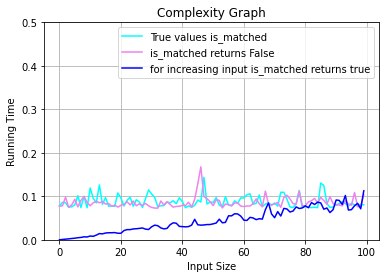

In [6]:
import time
from random import randint
import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

class StackMax:
    def __init__(self):
          
        # main stack 
        self.mainStack = [] 
      
        # auxiliary stack to help tack the item with max value in the list
        self.auxiliaryStack = []
  
    def push(self, x):
        self.mainStack.append(x) 
        if (len(self.mainStack) == 1):
            self.auxiliaryStack.append(x) 
            return
   
        if (x > self.auxiliaryStack[-1]): # If the current element is greater than the top element of the auxiliary stack,
            self.auxiliaryStack.append(x)  # append the current element to the auxiliary stack
        else:
            self.auxiliaryStack.append(self.auxiliaryStack[-1]) # else append the element at top of the auxiliary stack again into it.
  
    def max(self):
        return self.auxiliaryStack[-1]
  
    def pop(self):
        self.auxiliaryStack.pop()
        return self.mainStack.pop() 

    def size(self): #the stack size is equal to the length of items
        return len(self.mainStack) 

# Randomising 100 brackets in a string will almost always return false for all tests
# Using a tree, we can build strings that will return True and False ie a better real world test.
def random_bracket_string(bracket_length):
    #bracket_length = 1000000
    bracket_stack = StackMax()
    test_string = ""
    for i in range(0, bracket_length):
        path = randint(0, 2)
        if path == 0: 
            char = randint(0, 2)
            if char == 0:
                test_string += "("
                bracket_stack.push(")")
            elif char == 1:
                test_string += "["
                bracket_stack.push("]")
            elif char == 2:
                test_string += "{"
                bracket_stack.push("}")
        elif path == 1:
            if bracket_stack.size() == 0: #size is the length method from stack above
                i = i - 1
            else:
                test_string += str(bracket_stack.pop())
    while bracket_stack.size() > 0:
        test_string += str(bracket_stack.pop())
    return test_string

#SOLUTION FOR THIS BRACKET QUESTION
def is_matched(expression):
    opening = tuple('({[')
    closing = tuple(')}]')
    mapping = dict(zip(opening, closing))
    queue = []

    for letter in expression:
        if letter in opening:
            queue.append(mapping[letter])
        elif letter in closing:
            if not queue or letter != queue.pop():
                return False
    return not queue

#string = "([{}])"
#print(is_matched(test_string))


#TEST PUSH
#make lots of true bracket strings all of which are true. Constant complexity with constant input size
list_of_int = 100
list1 = [random_bracket_string(1000000) for i in range(list_of_int)] 
times=[]
for x in range(0, list_of_int): 
    start_time = time.time()
    is_matched(list1[x])
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
x_values = [i for i in range(0, list_of_int)]

#make lots of bracket strings all of which are false. Constant complexity with constant input size
times_false=[]
for x in range(0, list_of_int): 
    start_time = time.time()
    is_matched(list1[x][0:-1] + "(") #if the whole string was balanced, then adding one more character makes the total uneven and therefor no match. Return false. 
    elapsed_time = time.time() - start_time
    times_false.append(elapsed_time)
x_values_false = [i for i in range(0, list_of_int)]

#make lots of true bracket strings from length 1 to 100 (they will be true because of the pop in randombracket string that always returns a true match)
list2 = [random_bracket_string(int(i * 1000000 / list_of_int)) for i in range(list_of_int)] 
times_var=[]
for x in range(0, list_of_int): 
    start_time = time.time()
    is_matched(list2[x])
    elapsed_time = time.time() - start_time
    times_var.append(elapsed_time)
x_values_var = [i for i in range(0, list_of_int)]


# #PLOT GRAPHS
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("Input Size")
plt.ylabel("Running Time")
plt.title("Complexity Graph")
# Plotting all the graphs
plt.plot(x_values, times, color="cyan", label = "True values is_matched")
plt.plot(x_values_false, times_false, color="violet", label = "is_matched returns False")
plt.plot(x_values_var, times_var, color="blue", label = "for increasing input is_matched returns true")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 0.5]) 

The number of input brackets (string length) is equal each time the first two test run. 
Those two graph plots may show fluctuations due to:
- The number of brackets held in memory whilst seeking pairs. (spike)
- The matched brackets are popped (dip)

#### References
- https://en.wikipedia.org/wiki/Sequence
- Benjamin Baka, Python Data Structures and Algorithm (2017)
- https://www.openbookproject.net/books/bpp4awd/ch03.html
- https://www.codegrepper.com/code-examples/python/valid+bracket+sequence+python


